In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.signal import medfilt
%matplotlib inline

In [2]:
results = np.genfromtxt("results.csv", delimiter = ",")

temperature = results[1:,1]
voltage = results[1:,2]

temperature_warming = temperature[1000:]
voltage_warming = voltage[1000:]

# Temperature as a function of voltage

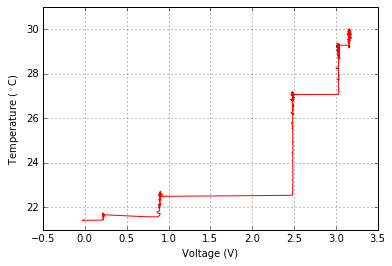

In [3]:
plt.plot(voltage_warming, temperature_warming, "-", c="r")

plt.xlabel("Voltage (V)")
plt.ylabel("Temperature ($^\circ$C)")
plt.grid(True)
plt.show()

# Filtering and data extraction

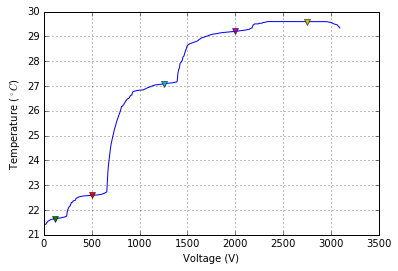

In [4]:
temperature_warming_filtered = medfilt(temperature_warming, kernel_size=1501)

plt.plot(temperature_warming_filtered)

steps = [120, 500, 1250, 2000, 2750]
t = np.zeros(len(steps))
v = np.zeros_like(t)

i = 0
for value in steps:
    plt.plot(value, temperature_warming_filtered[value], "v")
    v[i] = voltage_warming[value]
    t[i] = temperature_warming_filtered[value]
    i += 1
    
plt.grid(True)
plt.ylabel("Temperature ($^\circ C$)")
plt.xlabel("Voltage (V)")
plt.show()

In [5]:
def regresion(x_array, y_array, order, n=100):
    """
        Returns: array of regresion values
    """
    coeff = np.polyfit(x_array, y_array, order)
    x = np.linspace(0, max(x_array)*1.1, n)
    y = np.zeros_like(x)
    for i in range(order+1):
        y += coeff[i]*x**(order-i)
    return x, y, coeff

def equation_text(coefficients, variable):
    """
        Returns: the equation of regresion as text
    """
    text = []
    
    i = len(coefficients)-1
    for (j, cons) in enumerate(coefficients):
        if j == i:
            text.append("$%.3f$"%cons)
        elif i-j == 1:
            text.append("$%.3f$"%(cons) + variable)
        else:            
            text.append("$%.3f$"%cons + variable+"$^%d$"%(i-j))
    
    text = "$+$".join(text)
    return text

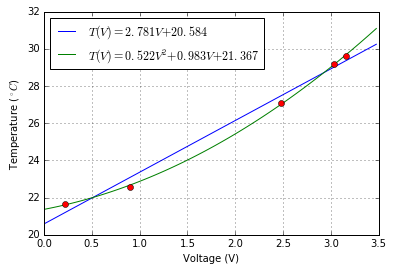

In [6]:
for i in range(1,3):
    x, y, coeff = regresion(v, t, i)    
    text = equation_text(coeff, "$V$")
    plt.plot(x, y, "-", label="$T(V)=$"+text)

plt.plot(v, t, "o")
plt.ylabel("Temperature ($^\circ C$)")
plt.xlabel("Voltage (V)")
plt.grid(True)
plt.legend(loc = "upper left")
plt.show()